In [1]:
# iris데이터를 분류
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
# dictionary
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
print(f"학습 데이터셋 크기 : {iris.data.shape}")
print(f"타겟 데이터셋 크기 : {iris.target.shape}")

학습 데이터셋 크기 : (150, 4)
타겟 데이터셋 크기 : (150,)


In [9]:
# 데이터 프레임으로 변환
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [10]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['target'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df.duplicated().sum()

1

In [18]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
# 상관관계
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


In [25]:
# heat map
import seaborn as sns
import matplotlib.pyplot as plt

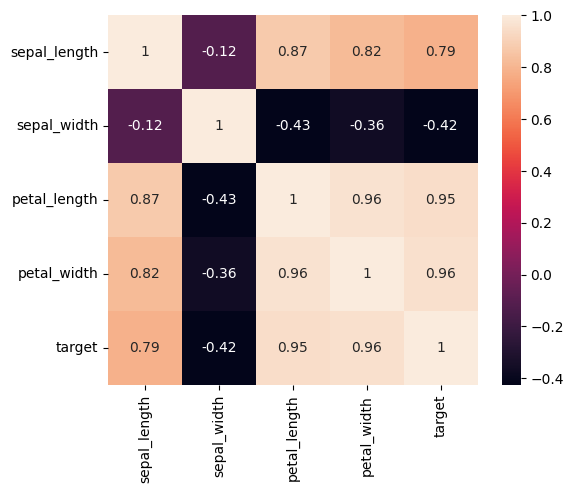

In [26]:
sns.heatmap(data=df.corr(),square=True, annot=True, cbar=True)
plt.show()

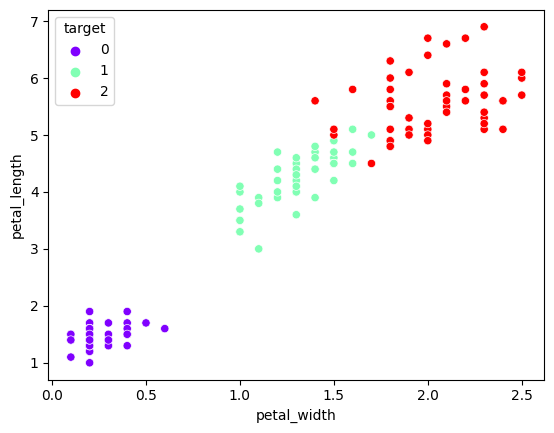

In [32]:
sns.scatterplot(data=df, x= 'petal_width', y='petal_length',hue = 'target',palette='rainbow')
plt.show()

In [33]:
df.target.value_counts()

1    50
0    50
2    49
Name: target, dtype: int64

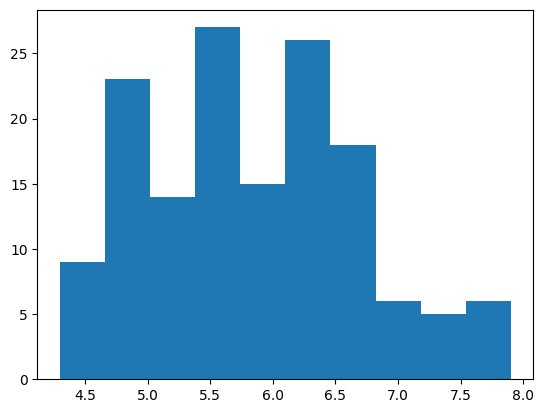

In [34]:
plt.hist(data=df, x='sepal_length')
plt.show()

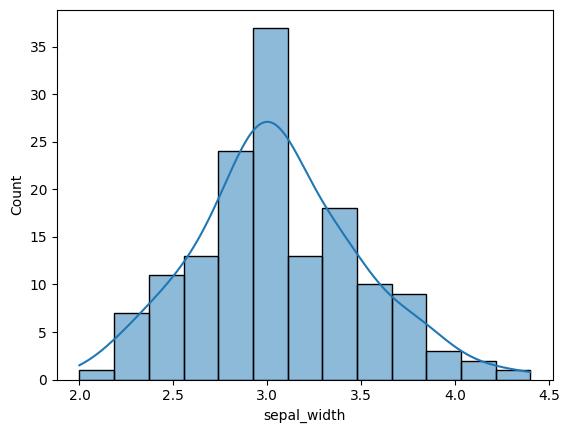

In [36]:
sns.histplot(data=df, x = 'sepal_width', kde=True)
plt.show()

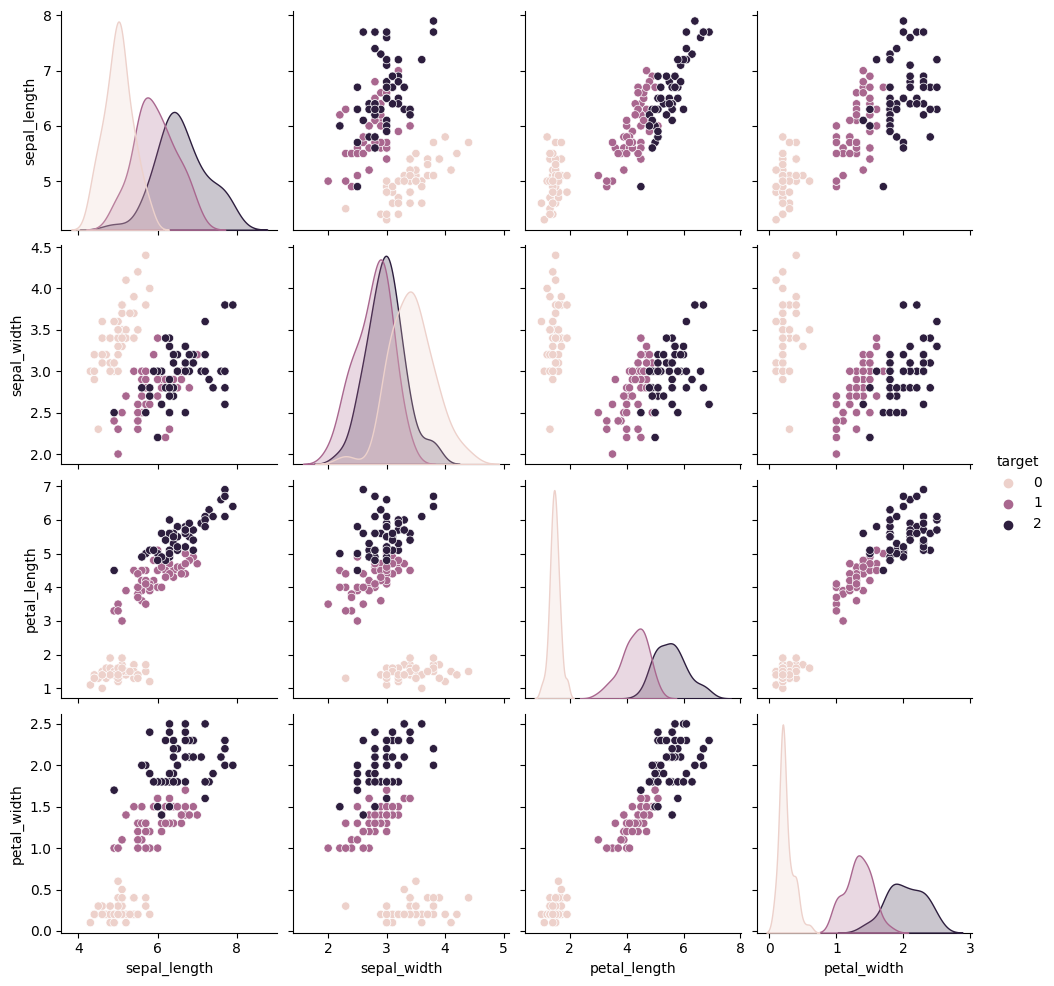

In [38]:
sns.pairplot(data=df, diag_kind='kde',hue='target')

In [39]:
# 분류
# k-이웃 logisticleg...

In [40]:
X = iris.data
Y = iris.target

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
ss =  StandardScaler()
X = ss.fit_transform(X)

In [80]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42)

In [81]:
# 모델 선택  분류
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [82]:
kc =  KNeighborsClassifier()
kc.fit(x_train,y_train)
kc.score(x_train,y_train),kc.score(x_test,y_test)

(0.9642857142857143, 1.0)

In [83]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.9642857142857143, 1.0)

In [84]:
# 회귀

In [88]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
# iris품종에서 petal_width 예측하기

In [90]:
# 1.종속변수는 petal_width  독립변수가 하나일대(petal_length)
# 2.종속변수는 petal_width  독립변수가 여러개일때(sepal_length,sepal_width,petal_length)

In [92]:
X = df['petal_length']
Y = df['petal_width']

In [133]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ss = StandardScaler()
X = np.array(X).reshape(-1,1)
X = ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.9222998580109018, 0.9375868983535627)

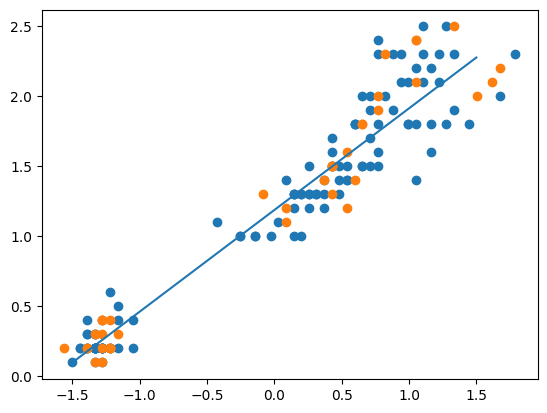

In [134]:
# 머신러닝 선형회귀 시각화
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
x = np.arange(-1.5,2.5)
y =lr.predict(x.reshape(-1,1))
plt.plot(x,y)
#

In [135]:
x_train.shape, y_train.shape

((111, 1), (111,))

In [136]:
# 피처공학
# 2차원... N차원
# 2차원
# 2차원의 곡석도 추가해 볼것..
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=5)
x_train = pf.fit_transform(x_train.reshape(-1,1))
x_test = pf.fit_transform(x_test.reshape(-1,1))
print(x_train.shape, x_test.shape)
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(111, 6) (38, 6)


(0.9302466034583577, 0.950886028450472)

In [137]:
# 과대적합이 발생하면. 규제 알고리즘을적용 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [144]:
# 알파조정
ridge = Ridge()
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train), ridge.score(x_test,y_test)

(0.9282341463905773, 0.9508639140012627)

In [145]:
#알파조정
lasso = Lasso()
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train), lasso.score(x_test,y_test)

(0.39825429043128857, 0.4285072821825914)

In [146]:
# 다항 선형회귀
# 종속변수  Y = df['petal_width']
# 독립변수  나머지 3

In [154]:
X = df.iloc[:,:3]
Y = df.iloc[:,3]

In [156]:
ss =  StandardScaler()
X = ss.fit_transform(X)
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42)

In [157]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [158]:
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.9344683389756812, 0.9446430964223741)

In [164]:
X = df.iloc[:,:2]
ss =  StandardScaler()
X = ss.fit_transform(X)
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.7234402390752399, 0.7940877335055342)

In [165]:
# 특성이 여러개인 1차원 방정식을 다차원 방정식으로 적용
# 과적합이 일어나면 규제 알고리즘을 적용 L1  L2